In [46]:
from scipy import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from pylab import *

def curve_fit_custom(f, xdata, ydata, p0=None, sigma=None, **kw):
    """
    Pass all arguments to curve_fit, which uses non-linear least squares
    to fit a function, f, to data.  Calculate the uncertaities in the
    fit parameters from the covariance matrix.
    """
    popt, pcov = curve_fit(f, xdata, ydata, p0, sigma, **kw)

    if sigma is None:
        chi2 = sum(((f(xdata,*popt)-ydata))**2)
    else:
        chi2 = sum(((f(xdata,*popt)-ydata)/sigma)**2)
    dof = len(ydata) - len(popt)
    rchi2 = chi2/dof
    print ('results of general_fit:')
    print ('   chi squared = ', chi2)
    print ('   degrees of freedom = ', dof)
    print ('   reduced chi squared = ', rchi2)

    # The uncertainties are the square roots of the diagonal elements
    punc = zeros(len(popt))
    for i in arange(0,len(popt)):
        punc[i] = sqrt(pcov[i,i])
    return popt, punc, rchi2, dof

from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib.pyplot import errorbar
import math as m
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [47]:
udecayt,utimes =loadtxt('c1=6.data',delimiter=' ',usecols=(0,1),skiprows=0,unpack=True)
index = 0
decayt = []
times = []

for i in range(0, len(udecayt), 1):
    if (udecayt[i] < 20000):
        decayt.append(udecayt[i]/1000)
        #times.append(times[i])

print(len(decayt))
#print(times)

2680


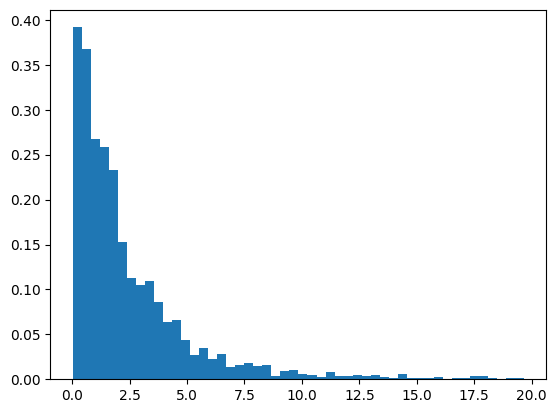

In [48]:
#figure(figsize=(10,10))
plt.hist(decayt, bins = 50,density = True)
show()


In [49]:
bins = np.linspace(min(decayt), max(decayt), 50)
#bins = np.linspace(0, 20, 50)
print(bins)
#decayCounts = np.histogram(decayt,50, range = (0,20), density=True)[0]
decayCounts = np.histogram(decayt,50, density=True)[0]
#for i in range(0, len(bins) -1, 1):
#    counts = 0
#    for j in range(0, len(decayt), 1):
#        if ((decayt[j] > bins[i]) and (decayt[j] < bins[i+1])):
#            counts += 1
#    decayCounts.append((counts/2680))

print(decayCounts)
#print(len(decayCounts))
pg1=[0.0005, 0.0005]


def f(x,k,c):
    return k*exp(-x*c)

(popt, punc, rc, d) = curve_fit_custom(f, bins, decayCounts,pg1)
print('k=',popt[0])
print('k-unc=',punc[0])
print('c=',popt[1])
print('c-unc=',punc[1])

[ 0.04        0.44040816  0.84081633  1.24122449  1.64163265  2.04204082
  2.44244898  2.84285714  3.24326531  3.64367347  4.04408163  4.4444898
  4.84489796  5.24530612  5.64571429  6.04612245  6.44653061  6.84693878
  7.24734694  7.6477551   8.04816327  8.44857143  8.84897959  9.24938776
  9.64979592 10.05020408 10.45061224 10.85102041 11.25142857 11.65183673
 12.0522449  12.45265306 12.85306122 13.25346939 13.65387755 14.05428571
 14.45469388 14.85510204 15.2555102  15.65591837 16.05632653 16.45673469
 16.85714286 17.25755102 17.65795918 18.05836735 18.45877551 18.85918367
 19.25959184 19.66      ]
[0.39177203 0.36704855 0.26720374 0.25864561 0.23297123 0.15309538
 0.11315745 0.10459933 0.10935384 0.08653217 0.0637105  0.06561231
 0.04374154 0.02662528 0.03518341 0.02282167 0.02852709 0.01331264
 0.01616535 0.01806716 0.01521445 0.01616535 0.00380361 0.00950903
 0.01045993 0.00570542 0.00475451 0.00285271 0.00760722 0.00380361
 0.00380361 0.00475451 0.00380361 0.00475451 0.00285271 

t1= 2.398518622789682
t2= 2.24061466781643


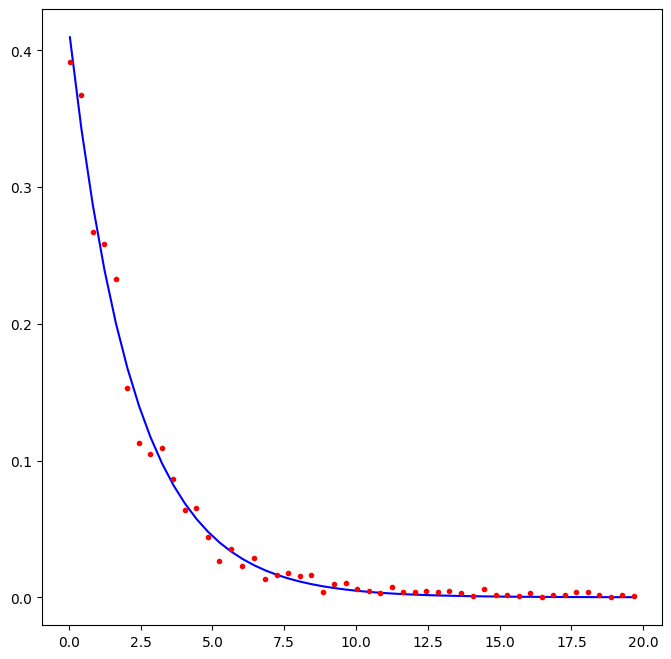

In [50]:
print("t1=",1/popt[0])
print("t2=",1/popt[1])
fit = f(bins, k=popt[0], c=popt[1])
figure(figsize=(8,8))
plot(bins, fit, 'b-')
plot(bins, decayCounts,'r.')
show()